In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [116]:
# Параметры задачи
L = 10
gamma = 5/3

v_l = 0
rho_l = 13
p_l = 10e5

v_r = 0
rho_r = 1.3
p_r = 1e5

t_boom = 0.02

# Уравнение состояния идеального газа
e_l = P_l / ((gamma - 1) * rho_l)
e_r = P_r / ((gamma - 1) * rho_r)

In [117]:
t_grid = np.linspace(0, t_boom, 2001)
tau = t_grid[1] - t_grid[0]

x_grid = np.linspace(-L, L, 201)
h = x_grid[1] - x_grid[0]

In [118]:
dummy_w = []
w = np.zeros([len(t_grid) + 1, len(x_grid), 3])
for i in range(len(x_grid) // 2):
    dummy_w.append(np.array((rho_l, rho_l * v_l, rho_l * e_l)))

for i in range(len(x_grid), len(x_grid) // 2, -1):
    dummy_w.append(np.array((rho_r, rho_r * v_r, rho_r * e_r)))

w[0] = np.array(dummy_w)

In [122]:
def f(prev, curr, next, A, omega, lambdabs, omega_inv):
    return curr - tau*(A @ (next-prev)/(2*h)) + tau*(omega_inv @ lambdabs @ omega) @ (next-2*curr+prev)/(2*h)

In [123]:
for n in range(len(t_grid)):
    for m in range(len(x_grid)):
        u = w[n][m][1] / w[n][m][0]
        e = w[n][m][2] / w[n][m][0]
        c = math.sqrt(gamma * (gamma - 1) * e)

        omega = np.array([[-u * c, c, gamma - 1], [-c ** 2, 0, gamma - 1], [u * c, -c, gamma - 1]])
        omega_inv = np.array([[1 / (2 * c**2), -2 / (2 * c**2), 1 / (2 * c**2)], [(u + c)/(2 * c**2), -2 * u/(2 * c**2), (u - c)/(2 * c**2)], [1 / (2 * (gamma - 1)), 0, 1/(2 * (gamma - 1))]])
        lambdabs = np.diag([abs(u + c), abs(u), abs(u - c)])

        CFL = max(abs(u + c), abs(u), abs(u - c)) * tau / h
        # assert CFL <= 1
        A = np.array([[0, 1, 0], [-u ** 2, 2 * u, gamma - 1], [-gamma * u * e, gamma * e, u]])
        if m == len(x_grid) - 1:
            w[n + 1][m] = f(w[n][m - 2], w[n][m - 1], w[n][m], A, omega, lambdabs, omega_inv)
        elif l == 0:
            w[n + 1][m] = f(w[n][m], w[n][m + 1], w[n][m + 2], A, omega, lambdabs, omega_inv)
        else:
            w[n + 1][m] = f(w[n][m - 1], w[n][m], w[n][m + 1], A, omega, lambdabs, omega_inv)

In [124]:
# Рисуем графики
time_bam = 0.015
N = int(len(t_grid) * time_bam / t_boom)

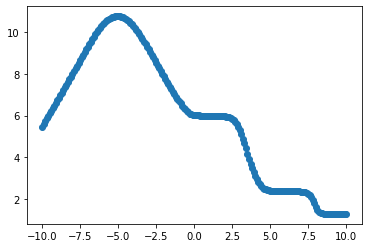

In [125]:
rho = w[N, :, 0]
plt.scatter(x_grid, rho)
plt.show()

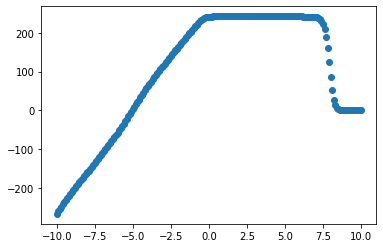

In [126]:
u = w[N, :, 1] / rho
plt.scatter(x_grid, u)
plt.show()

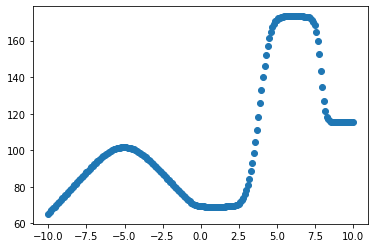

In [127]:
e = w[N, :, 2] / 1000 / rho
plt.scatter(x_grid, e)
plt.show()

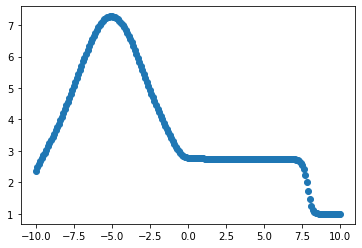

In [128]:
P = (gamma - 1) * rho * e / 100
plt.scatter(x_grid, P)
plt.show()